# Importing  Liabraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Importing csv File

#Loading Banglore home prices into a data frame df.

In [59]:
df=pd.read_csv("C://Users//Masna_2//Desktop//projects//Bengaluru_House_Data.csv")

# studying the DataFrame

#viewing first 5 rows of the data set

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


checking number of rows and columns of the data set

In [6]:
df.shape

(13320, 9)

In [ ]:
#Viewing names of columns presen in the data set

In [14]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [ ]:
#getting the information about the dataset

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


finding the statistical information about the data

In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


# Data Cleaning:

checking the null values

In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
#dropping columns "society(5502 nan values),availability as it is irrelevent"

In [60]:
df1=df.drop(["society","availability"],axis=1)

In [18]:
df1

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [13]:
df1.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [20]:
#replacing nan values in balcony column with mode

In [61]:
df1["balcony"]=df1["balcony"].fillna(df1["balcony"].mode()[0])


In [62]:
df1.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [ ]:
#droping row where size and bath is naan 

In [63]:
df1=df1.dropna()

In [64]:
df1.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

# Explratory Data Analysis

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13246 non-null  object 
 1   location    13246 non-null  object 
 2   size        13246 non-null  object 
 3   total_sqft  13246 non-null  object 
 4   bath        13246 non-null  float64
 5   balcony     13246 non-null  float64
 6   price       13246 non-null  float64
dtypes: float64(3), object(4)
memory usage: 827.9+ KB


In [ ]:
#dealing size column

In [27]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [28]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [65]:
df1['bhk']=df1['size'].apply(lambda x: int(x.split(" ")[0]))

In [66]:
df1.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [31]:
df1["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [32]:
df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [42]:
df1.balcony.unique()

array([1., 3., 2., 0.])

In [ ]:
#presence of range value like this '1133 - 1384' .so need to convert it into single value

In [ ]:
#function to check value is float or not

In [67]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
    

In [ ]:
#negate operation is used to return rows  where total_sqft value is not float

In [68]:
df1[~df1["total_sqft"].apply(is_float)].head(10)

,area_type,location,size,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
648,Built-up Area,Arekere,9 Bedroom,4125Perch,9.0,2.0,265.000,9
661,Super built-up Area,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Built-up Area,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4


In [ ]:
#converting the range value to average

In [69]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [144]:
convert_sqft_to_num('2100-2850')

2475.0

In [37]:
convert_sqft_to_num('2100')

2100.0

In [70]:
df2=df1.copy()

In [71]:
df2["total_sqft"]=df2["total_sqft"].apply(convert_sqft_to_num)

In [24]:
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [148]:
df2.loc[30]

area_type     Super built-up  Area
location                 Yelahanka
size                         4 BHK
total_sqft                    2475
bath                             4
balcony                          0
price                          186
bhk                              4
Name: 30, dtype: object

# Feature Engineering
#outlier detection and removal

In [ ]:
#adding new feature called price per square feet

In [72]:
df3=df2.copy()

In [73]:
df3["price_per_sqft"]=df3["price"]*100000/df3['total_sqft']
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


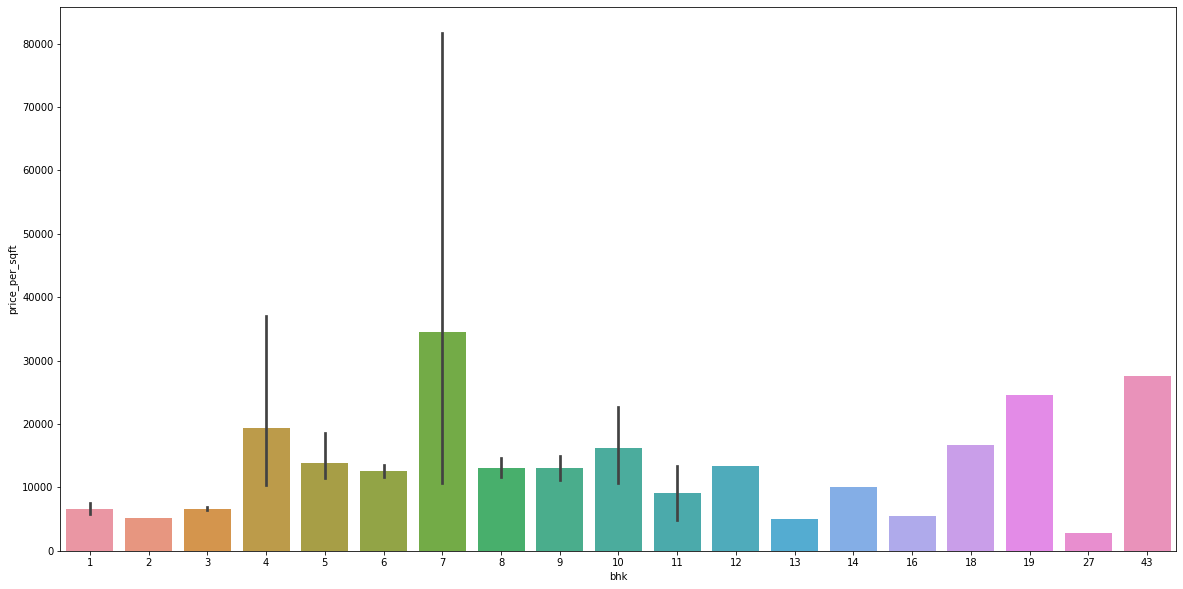

In [74]:
plt.figure(figsize=(20,10))
sns.barplot(x='bhk', y = 'price_per_sqft',data = df3)

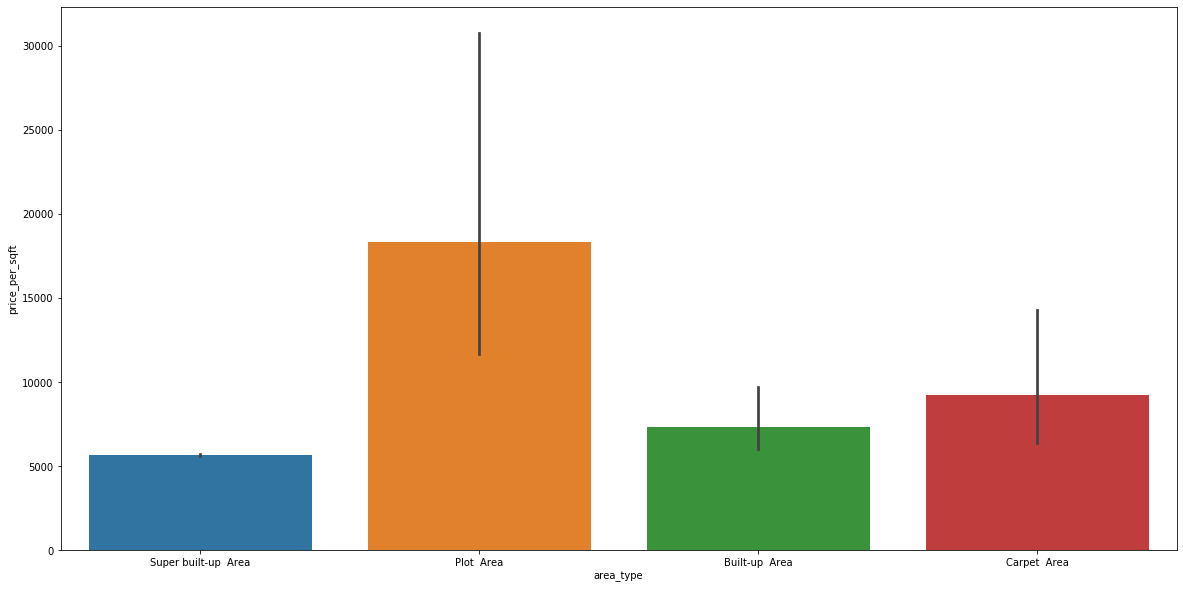

In [29]:
plt.figure(figsize=(20,10))
sns.barplot(x='area_type', y ='price_per_sqft',data = df3)

In [ ]:
#working with location column

In [ ]:
#We will use Dimensionality Reduction to reduce the numbeer of Locations

#Here dimensionality is a categorical variable

In [45]:
len(df3.location.unique())

1304

In [ ]:
#Stripping extra space(leading and trailing)using lambds function

In [75]:
df3.location=df3.location.apply(lambda x:x.strip())
location_stats=df3['location'].value_counts().sort_values(ascending=False)
location_stats

Whitefield                    535
Sarjapur  Road                392
Electronic City               304
Kanakpura Road                266
Thanisandra                   236
                             ... 
Hosahalli                       1
Chellikere                      1
BTM Layout 1stage 9th Main      1
Rukmaiah Layout                 1
Gulakamale                      1
Name: location, Length: 1293, dtype: int64

In [ ]:
#now we are checking location < 10 data points

In [152]:
len(location_stats[location_stats<=10])

1052

In [48]:
#considering these these locations as other location

In [ ]:
#To reduce the number of locations, we can say that any location that has less than 10 data points is called other location

In [76]:
loc_stat_lessthan10=location_stats[location_stats<=10]
loc_stat_lessthan10

BTM 1st Stage                 10
Nagappa Reddy Layout          10
Kalkere                       10
Dairy Circle                  10
Ganga Nagar                   10
                              ..
Hosahalli                      1
Chellikere                     1
BTM Layout 1stage 9th Main     1
Rukmaiah Layout                1
Gulakamale                     1
Name: location, Length: 1052, dtype: int64

In [77]:
df3.location=df3.location.apply(lambda x:"other" if x in loc_stat_lessthan10 else x)
len(df3.location.unique())

242

In [51]:
df3.head(10)

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
6,Super built-up Area,Old Airport Road,4 BHK,2732.0,4.0,2.0,204.00,4,7467.057101
7,Super built-up Area,Rajaji Nagar,4 BHK,3300.0,4.0,2.0,600.00,4,18181.818182
8,Super built-up Area,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
9,Plot Area,other,6 Bedroom,1020.0,6.0,2.0,370.00,6,36274.509804


In [78]:
df3.shape

(13246, 9)

Finding the correlation in the data

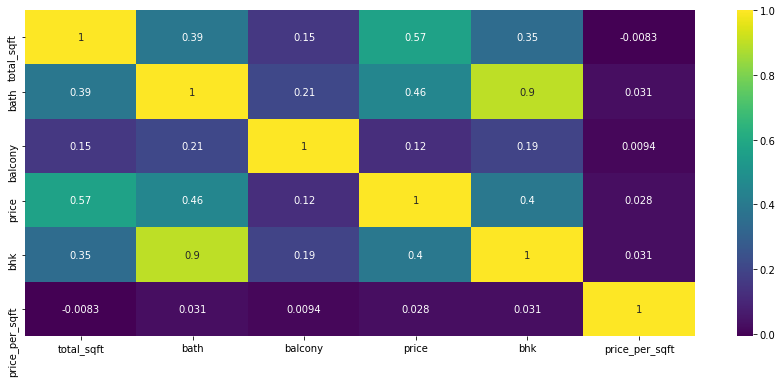

In [33]:
plt.figure(figsize=(15,6))
sns.heatmap(df3.corr(),cmap='viridis',annot=True)


In [34]:
df3.corr()['price']

total_sqft        0.574330
bath              0.456350
balcony           0.124711
price             1.000000
bhk               0.397222
price_per_sqft    0.028387
Name: price, dtype: float64

# Outlier Detection:



#Outlier Detection:
#Outliers are not errors but really large or small values which make no sense in the data. 


In [ ]:
#considering a bedroom ususally take 300sqft

In [ ]:
#outlier removal:

#keeping only datapoints where square feet of bedroom doesnot exceed the total squre feet by considering sqft of a bedroom
as 300sqft


#If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier.
#We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [79]:
df3[df3.total_sqft/df3.bhk<300].head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,Plot Area,other,6 Bedroom,1020.0,6.0,2.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,2.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000


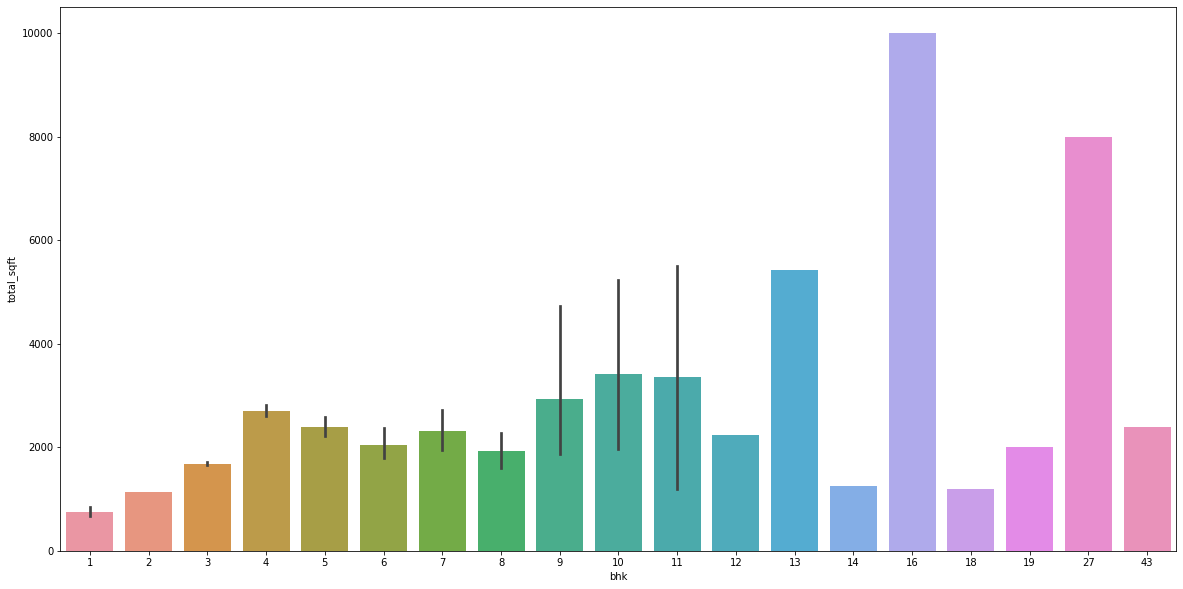

In [80]:
plt.figure(figsize=(20,10))
sns.barplot(x='bhk', y ='total_sqft',data = df3)

In [ ]:
#Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely

In [81]:
df4=df3[~(df3.total_sqft/df3.bhk<300)]

In [82]:
df4.shape

(12502, 9)

In [58]:
df4.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


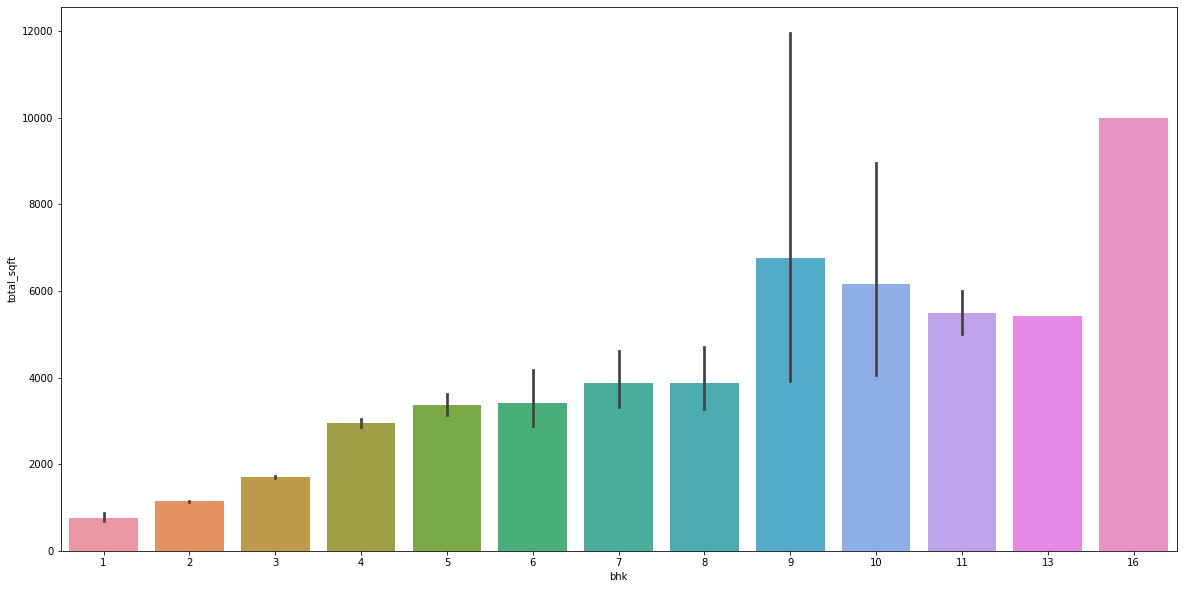

In [83]:
plt.figure(figsize=(20,10))
sns.barplot(x='bhk', y ='total_sqft',data = df4)

In [ ]:
#checking column price per squarefeet

In [59]:
df4.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
#Outlier Removal Using Standard Deviation and Mean

In [ ]:
#clearly the minimum value of square feet cannot be 267 rupees and maximum cannot be 176470

In [ ]:
#Basically what the below function does is take the data points per location and filter out the data points that have standard deviation that is greater than 1

In [ ]:
#keeping only datapoints on one standard deviation (68%)

In [84]:
def remove_outlier_pricepersqft(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        meanx=np.mean(subdf.price_per_sqft)
        stdx=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(meanx-stdx)) & (subdf.price_per_sqft<=(meanx+stdx))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [85]:
df5=remove_outlier_pricepersqft(df4)
df5.shape

(10241, 9)

In [ ]:
#One more thing that we have to check is that if the price of a two bhk apt is greater than 3bhk apt for the same square foot area

#We are going to plot a scatter plot which will tell us how many of these types of points we have

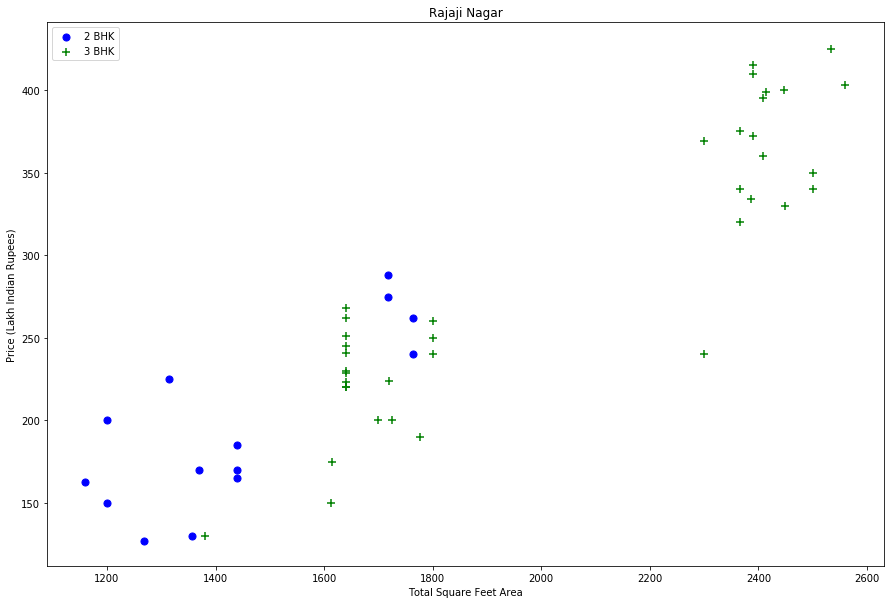

In [86]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50) # s is the marker size
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Rajaji Nagar")

In [ ]:
#for around 1700 sq foot area 4 of the two bedroom apt price is higher than 3 bedroom

In [ ]:
plot_scatter_chart(df5,"Hebbal")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
'1' : {
'mean': 4000,
'std: 2000,
'count': 34
},
'2' : {
'mean': 4300,
'std: 2300,
'count': 22
},
}
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [87]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_bhk_outliers(df5)
df6.shape

(7329, 9)

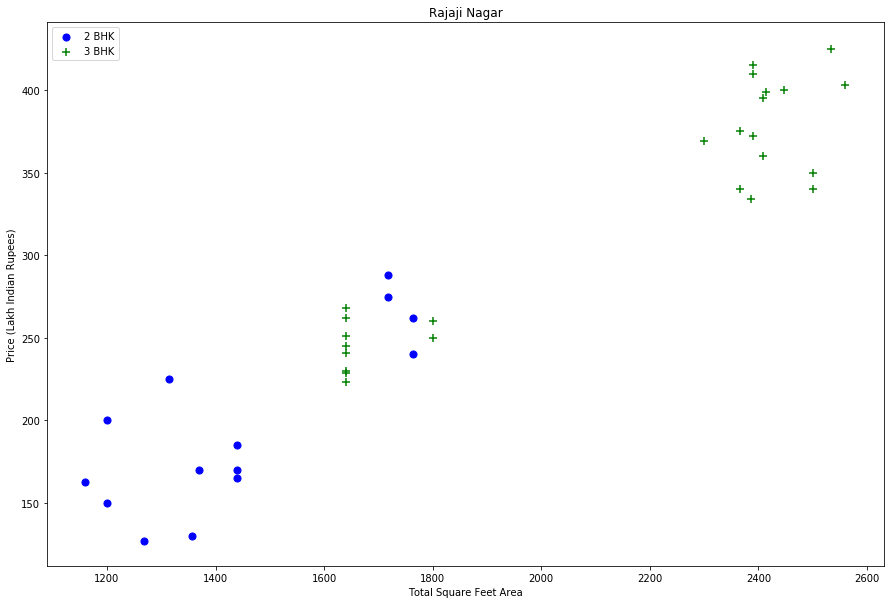

In [79]:

plot_scatter_chart(df6,"Rajaji Nagar")

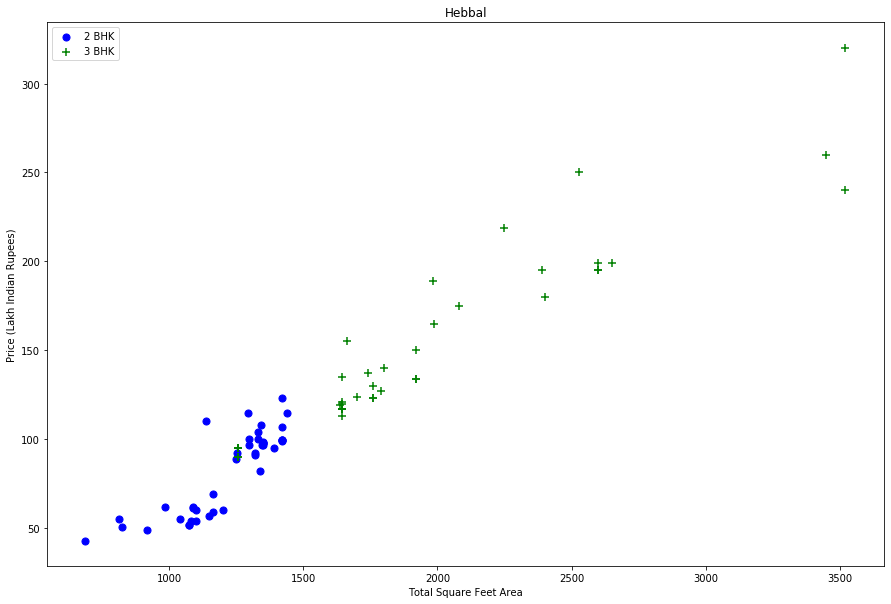

In [81]:
plot_scatter_chart(df6,"Hebbal")

In [ ]:
#trying to find out number of appartment per sqaure foot area

Text(0, 0.5, 'Count')

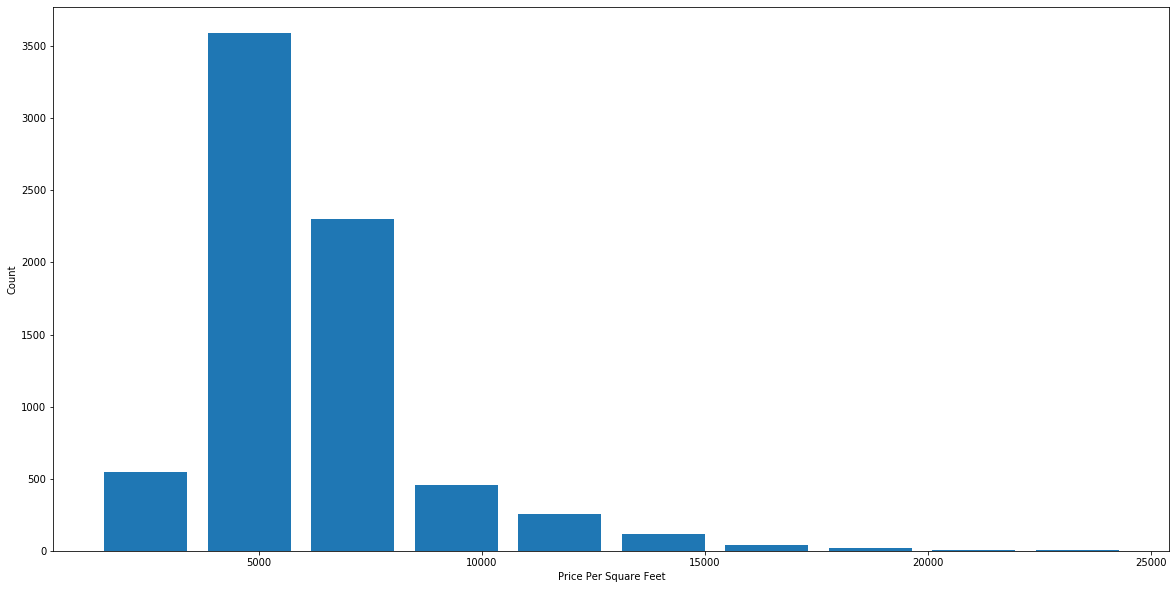

In [83]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [ ]:
#so from above histogram we can see that majority of datapoints lies between rs 0 to rs 10000 price per square feet 

In [ ]:
#now checking for dathroom column

In [85]:
df6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

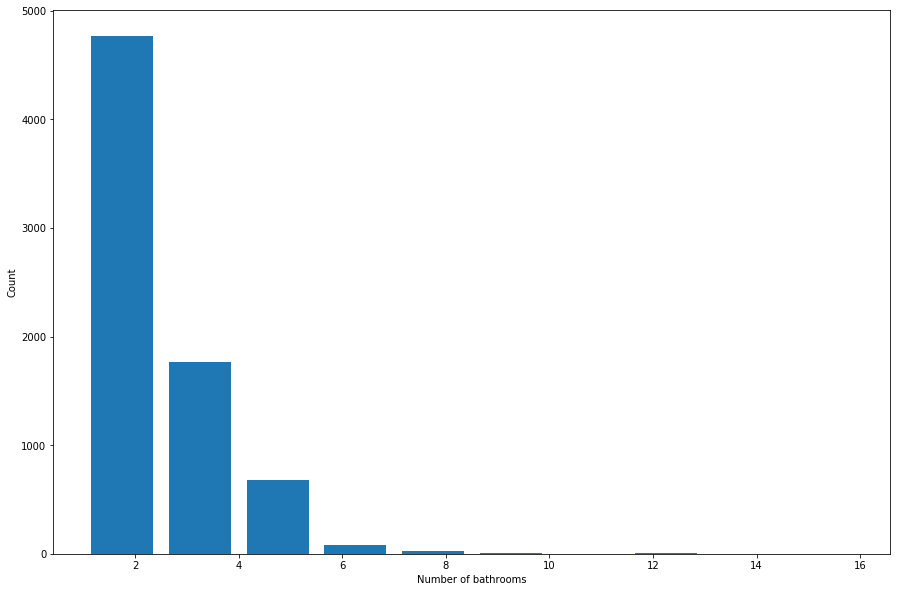

In [162]:
plt.hist(df6.bath,rwidth = 0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [88]:
df6[df6.bath>10]

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
5277,Super built-up Area,Neeladri Nagar,10 BHK,4000.0,12.0,2.0,160.0,10,4000.000000
8486,Super built-up Area,other,10 BHK,12000.0,12.0,2.0,525.0,10,4375.000000
8575,Super built-up Area,other,16 BHK,10000.0,16.0,2.0,550.0,16,5500.000000
9308,Super built-up Area,other,11 BHK,6000.0,12.0,2.0,150.0,11,2500.000000
9639,Super built-up Area,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


In [ ]:
#trying to remove records  if no of bath>no of bedroom + 2 

In [89]:
df6[df6.bath>df6.bhk+2]

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1626,Built-up Area,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
5238,Built-up Area,Nagasandra,4 Bedroom,7000.0,8.0,2.0,450.0,4,6428.571429
6711,Super built-up Area,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8411,Super built-up Area,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [ ]:
#we can see 4 bedroom with 8 bathroom,3 bedroom with 6 bathroom .So we can consider these as outliers

In [90]:
df7 = df6[df6.bath<df6.bhk+2]
df6.shape

(7329, 9)

In [ ]:
#considering the balcony column

In [95]:
df7.balcony.unique()

array([1., 2., 3., 0.])

Text(0, 0.5, 'Count')

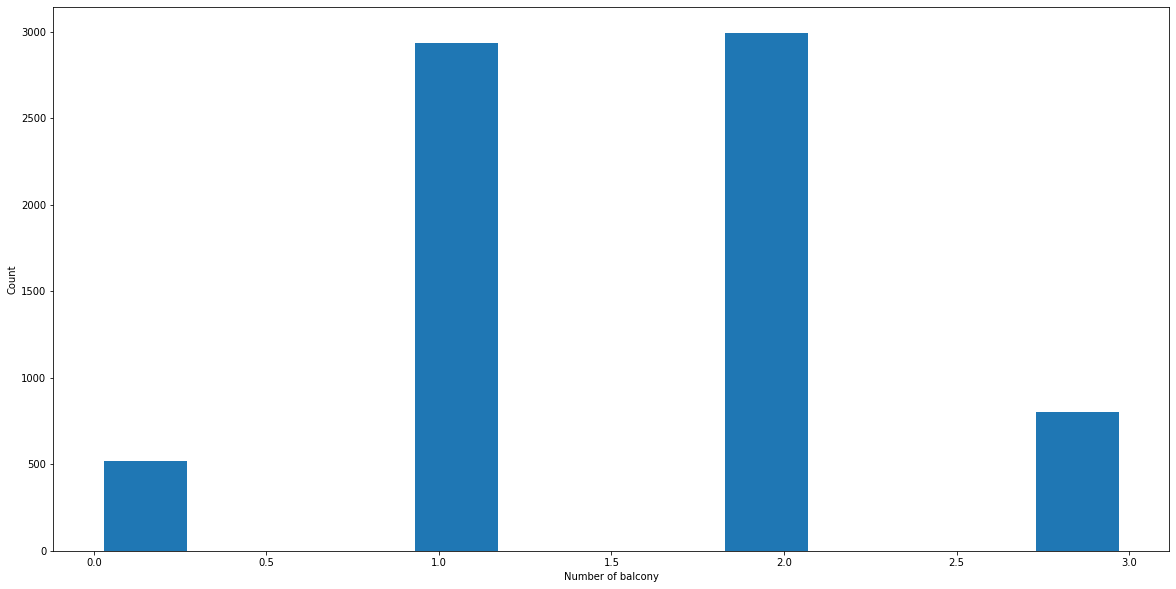

In [96]:
plt.hist(df7.balcony,rwidth = 0.8)
plt.xlabel("Number of balcony")
plt.ylabel("Count")

In [97]:
df7.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,Super built-up Area,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,Super built-up Area,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,Built-up Area,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,Super built-up Area,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668


In [91]:
df7.shape

(7251, 9)

In [ ]:
#dropping unnecessary columns

In [92]:
df8=df7.drop(["size","price_per_sqft"],axis=1)

In [167]:
df8.shape

(7251, 7)

size and price_per_sqft can be dropped because they were used only for outlier detection. Now the dataset is neat and clean and we can go for machine learning training

In [102]:
df8.head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


In [ ]:
# Encoding  of chategorical value and Machine Learning Model

In [93]:
dummies = pd.get_dummies(df8,['area_type','location'],drop_first=True)
dummies.head()

,total_sqft,bath,balcony,price,bhk,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2850.0,4.0,1.0,428.0,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
df=dummies
df.head()

,total_sqft,bath,balcony,price,bhk,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2850.0,4.0,1.0,428.0,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#applying standard scalar to standardize data

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
# define standard scaler
scaler = StandardScaler()
  
# transform data
dfscaled = scaler.fit_transform(df)

In [97]:
dfnew=pd.DataFrame(dfscaled,columns=df.columns)
dfnew.head()

,total_sqft,bath,balcony,price,bhk,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,1.692774,1.691030,-0.719533,3.781212,1.663712,-0.076329,-0.301171,0.608638,-0.047026,-0.033234,...,-0.023494,-0.023494,-0.065526,-0.18422,-0.038979,-0.109557,-0.057627,-0.033234,-0.071616,-0.430564
1,0.195772,0.625447,0.559225,1.112072,0.566125,-0.076329,-0.301171,0.608638,-0.047026,-0.033234,...,-0.023494,-0.023494,-0.065526,-0.18422,-0.038979,-0.109557,-0.057627,-0.033234,-0.071616,-0.430564
2,0.496400,-0.440135,1.837983,1.579742,0.566125,-0.076329,-0.301171,0.608638,-0.047026,-0.033234,...,-0.023494,-0.023494,-0.065526,-0.18422,-0.038979,-0.109557,-0.057627,-0.033234,-0.071616,-0.430564
3,-0.331860,-0.440135,-1.998291,0.382051,0.566125,-0.076329,-0.301171,-1.643012,-0.047026,-0.033234,...,-0.023494,-0.023494,-0.065526,-0.18422,-0.038979,-0.109557,-0.057627,-0.033234,-0.071616,-0.430564
4,-0.288913,-0.440135,0.559225,0.587369,-0.531461,-0.076329,-0.301171,0.608638,-0.047026,-0.033234,...,-0.023494,-0.023494,-0.065526,-0.18422,-0.038979,-0.109557,-0.057627,-0.033234,-0.071616,-0.430564


In [ ]:
#sepertating dependend and independendvariables

In [176]:
dfnew.shape

(7251, 249)

In [98]:
Y=dfnew.price
Y.head()

0    3.781212
1    1.112072
2    1.579742
3    0.382051
4    0.587369
Name: price, dtype: float64

In [99]:
X = dfnew.drop(['price'],axis=1)
X.head(3)

,total_sqft,bath,balcony,bhk,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,1.692774,1.691030,-0.719533,1.663712,-0.076329,-0.301171,0.608638,-0.047026,-0.033234,-0.023494,...,-0.023494,-0.023494,-0.065526,-0.18422,-0.038979,-0.109557,-0.057627,-0.033234,-0.071616,-0.430564
1,0.195772,0.625447,0.559225,0.566125,-0.076329,-0.301171,0.608638,-0.047026,-0.033234,-0.023494,...,-0.023494,-0.023494,-0.065526,-0.18422,-0.038979,-0.109557,-0.057627,-0.033234,-0.071616,-0.430564
2,0.496400,-0.440135,1.837983,0.566125,-0.076329,-0.301171,0.608638,-0.047026,-0.033234,-0.023494,...,-0.023494,-0.023494,-0.065526,-0.18422,-0.038979,-0.109557,-0.057627,-0.033234,-0.071616,-0.430564


# Model selection and applying machine learning algorim

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

Applying Linear Regresion

In [110]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf_score=lr_clf.score(X_test,y_test)
lr_clf_score

0.8475752712920427

finding cross validation score

In [103]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr_clf,X_train,y_train,cv=5)
score

array([0.89376328, 0.79621242, 0.83380657, 0.7837338 , 0.85764472])

In [ ]:
Applying decision tree  regressor algorithm

In [111]:
from sklearn.tree import DecisionTreeRegressor
dec_reg=DecisionTreeRegressor(random_state=0)
dec_reg.fit(X_train,y_train)
dec_reg_score=dec_reg.score(X_test,y_test)
dec_reg_score


0.7389935722393051

Applying KNeighbors Regressor

In [112]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
knn_score=knn.score(X_test,y_test)
knn_score

0.689785410767989

Applying random forest regressor

In [113]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)
rfr_score=rfr.score(X_test,y_test)
rfr_score

0.8312128809848274

In [114]:
Model_Comparison = pd.DataFrame({
    'Model' : ['Linear Regression','Random Forest Regression','Decision Tree Regression','KNeighbors regression'],
    'Scores_test': [lr_clf_score* 100 ,rfr_score* 100,dec_reg_score* 100,knn_score* 100]
    })
Model_Comparison

,Model,Scores_test
0,Linear Regression,84.757527
1,Random Forest Regression,83.121288
2,Decision Tree Regression,73.899357
3,KNeighbors regression,68.978541


concusion:Applying linear regression algorithm give maximum accuracy